In [180]:
import pandas as pd
import numpy as np
import acquire
import prepare
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.model_selection
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import logistic_regression_util
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import graphviz

from graphviz import Graph
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier

In [65]:
df = acquire.get_titanic_data()

In [66]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [67]:
train, test = prepare.prep_titanic(df)

In [68]:
train.shape

(712, 17)

In [69]:
X_train = train[['fare', 'pclass']]
X_test = test[['fare', 'pclass']]

In [70]:
y_train = train[['survived']]
y_test = test[['survived']]

## Fit a logistic regression model on your training data using sklearn's linear_model.LogisticRegression class. Use fare and pclass as the predictors.

In [71]:
logit = LogisticRegression(C=1, random_state = 123, solver='saga')

In [72]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred = logit.predict(X_train)

In [74]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [75]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['died', 'survived'])

In [76]:
y_test_pred = logit.predict(X_test)

In [77]:
y_test_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [78]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       435
           1       0.67      0.31      0.43       277

    accuracy                           0.67       712
   macro avg       0.67      0.61      0.60       712
weighted avg       0.67      0.67      0.64       712



In [79]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80       114
           1       0.71      0.37      0.48        65

    accuracy                           0.72       179
   macro avg       0.71      0.64      0.64       179
weighted avg       0.71      0.72      0.69       179



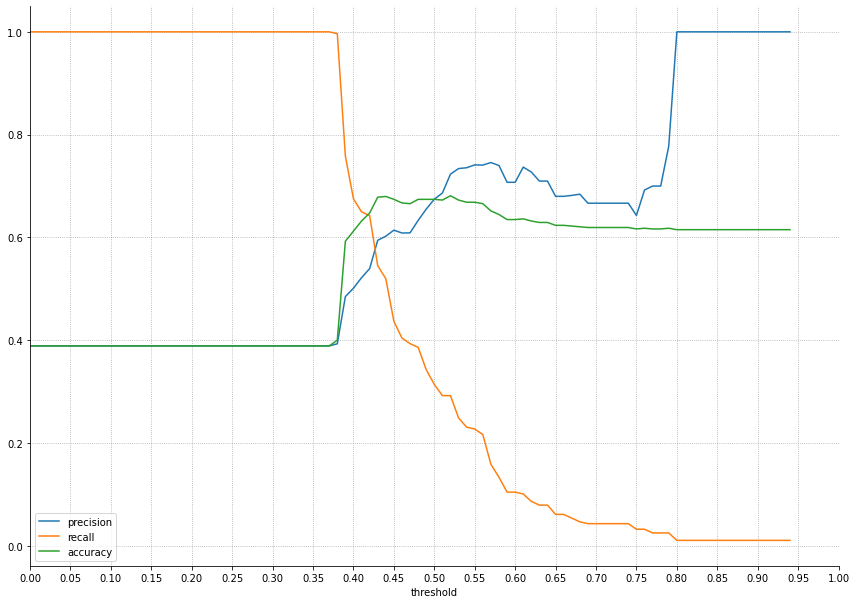

In [80]:
logistic_regression_util.plot_metrics_by_thresholds(y_train.survived, y_pred_proba.survived)

## Create another model that includes age in addition to fare and pclass. Does this model perform better than your previous one?

In [81]:
df = acquire.get_titanic_data()

In [82]:
train, test = prepare.prep_titanic(df)

In [83]:
train, validate = sklearn.model_selection.train_test_split(train, train_size=.8, random_state=123)

In [84]:
df.shape, train.shape, test.shape, validate.shape

((891, 13), (569, 17), (179, 17), (143, 17))

In [85]:
X_train = train[['fare', 'pclass', 'age']]
y_train = train[['survived']]


X_validate = validate[['fare', 'pclass', 'age']]
y_validate = validate[['survived']]

X_test = test[['fare', 'pclass', 'age']]
y_test = test[['survived']]




In [86]:
logit = LogisticRegression(C=1, random_state = 123, solver='saga')

In [87]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
y_pred = logit.predict(X_train)

In [89]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [90]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['died', 'survived'])


In [91]:
y_pred_proba

,died,survived
0,0.476150,0.523850
1,0.684312,0.315688
2,0.699981,0.300019
3,0.674554,0.325446
4,0.730417,0.269583
...,...,...
564,0.684072,0.315928
565,0.644948,0.355052
566,0.683402,0.316598
567,0.653332,0.346668


In [92]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       345
           1       0.67      0.31      0.42       224

    accuracy                           0.67       569
   macro avg       0.67      0.60      0.59       569
weighted avg       0.67      0.67      0.63       569



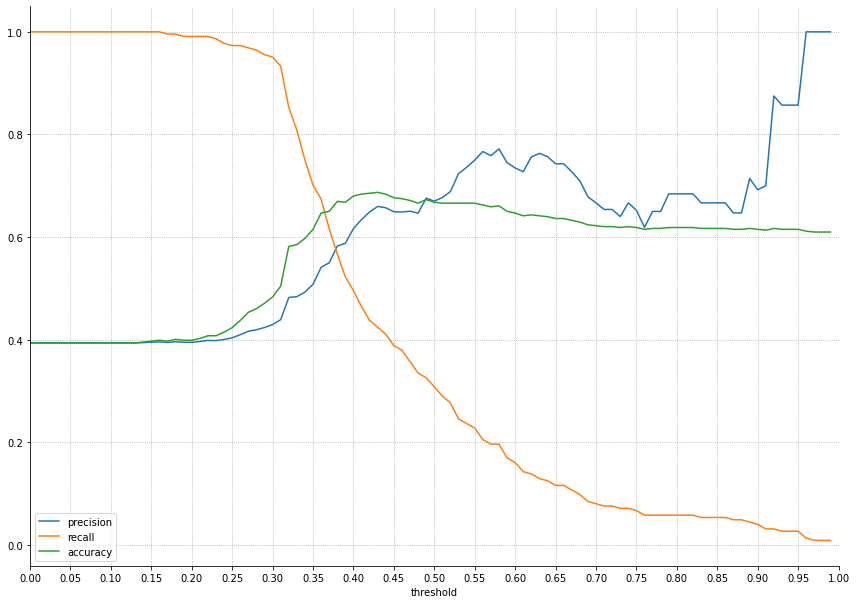

In [93]:
logistic_regression_util.plot_metrics_by_thresholds(y_train.survived, y_pred_proba.survived)

In [94]:
y_pred_val =logit.predict(X_validate)
y_pred_proba = logit.predict_proba(X_validate)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['died', 'survived'])
t = 0.40
yhat = (y_pred_proba > t).astype(int)


In [95]:
print(classification_report(y_validate, yhat.survived))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        90
           1       0.53      0.40      0.45        53

    accuracy                           0.64       143
   macro avg       0.61      0.59      0.59       143
weighted avg       0.63      0.64      0.63       143



In [96]:
y_pred_val =logit.predict(X_validate)

In [97]:
y_pred_test =logit.predict(X_test)
y_pred_proba = logit.predict_proba(X_test)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['died', 'survived'])
t = 0.40
yhat = (y_pred_proba > t).astype(int)

print(classification_report(y_test, yhat.survived))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       114
           1       0.59      0.58      0.59        65

    accuracy                           0.70       179
   macro avg       0.68      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179



## Include sex in your model as well. Note that you'll need to encode this feature before including it in a model.

In [98]:
df = acquire.get_titanic_data()

In [99]:
train, test = prepare.prep_titanic(df)
train, validate = sklearn.model_selection.train_test_split(train, train_size=.8, random_state=123)

In [100]:
encoder = sklearn.preprocessing.OneHotEncoder(sparse = False)
encoder.fit(train[['sex']])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

In [101]:
m = encoder.transform(train[['sex']])

In [102]:
train = pd.concat([train, pd.DataFrame(m, columns = ['female', 'male'], index=train.index)], axis =1)

In [103]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,C,Q,S,age_scaled,fare_scaled,female,male
535,535,1,2,female,7.000000,0,2,26.2500,S,Second,Southampton,0,0.0,0.0,1.0,0.082684,0.051237,1.0,0.0
573,573,1,3,female,29.832908,0,0,7.7500,Q,Third,Queenstown,1,0.0,1.0,0.0,0.369602,0.015127,1.0,0.0
736,736,0,3,female,48.000000,1,3,34.3750,S,Third,Southampton,0,0.0,0.0,1.0,0.597889,0.067096,1.0,0.0
713,713,0,3,male,29.000000,0,0,9.4833,S,Third,Southampton,1,0.0,0.0,1.0,0.359135,0.018510,0.0,1.0
528,528,0,3,male,39.000000,0,0,7.9250,S,Third,Southampton,1,0.0,0.0,1.0,0.484795,0.015469,0.0,1.0


In [104]:
m = encoder.transform(test[['sex']])
test= pd.concat([test, pd.DataFrame(m, columns = ['female', 'male'], index=test.index)], axis =1)

In [105]:
m = encoder.transform(validate[['sex']])
validate= pd.concat([validate, pd.DataFrame(m, columns = ['female', 'male'], index=validate.index)], axis =1)

In [106]:
X_train = train[['fare', 'pclass', 'age', 'female', 'male']]
y_train = train[['survived']]


X_validate = validate[['fare', 'pclass', 'age', 'female', 'male']]
y_validate = validate[['survived']]

X_test = test[['fare', 'pclass', 'age', 'female', 'male']]
y_test = test[['survived']]

In [107]:
logit = LogisticRegression(C=1, random_state = 123, solver='saga')

In [108]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
y_pred = logit.predict(X_train)

In [110]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       345
           1       0.68      0.31      0.43       224

    accuracy                           0.67       569
   macro avg       0.67      0.61      0.60       569
weighted avg       0.67      0.67      0.64       569



In [111]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['died', 'survived'])

In [112]:
y_pred_proba.head(2)

,died,survived
0,0.465632,0.534368
1,0.670388,0.329612


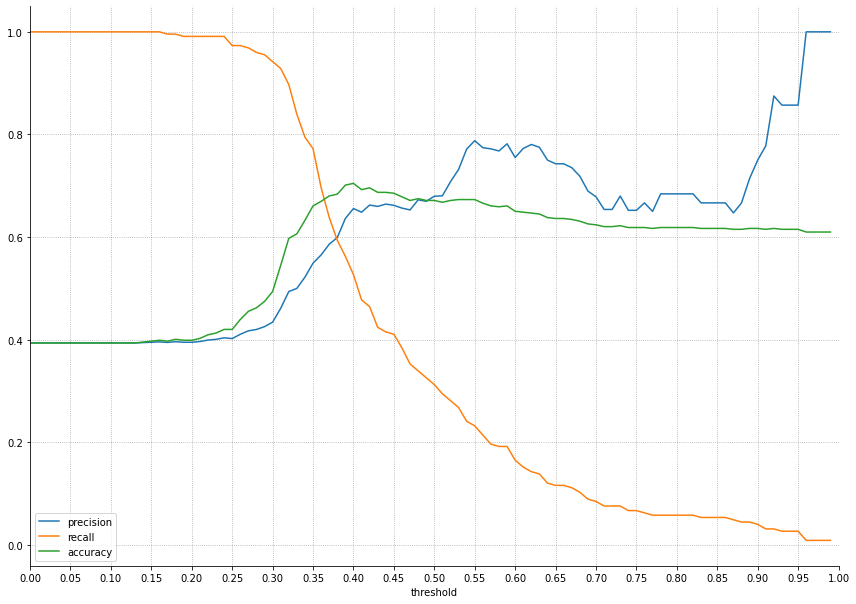

In [113]:
logistic_regression_util.plot_metrics_by_thresholds(y_train.survived, y_pred_proba.survived)

In [114]:
y_pred = logit.predict(X_validate)

In [115]:
y_pred_proba = logit.predict_proba(X_validate)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['died', 'survived'])
t = 0.40
yhat = (y_pred_proba > t).astype(int)

print(classification_report(y_validate, yhat.survived))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        90
           1       0.56      0.45      0.50        53

    accuracy                           0.66       143
   macro avg       0.63      0.62      0.62       143
weighted avg       0.65      0.66      0.66       143



In [116]:
y_pred = logit.predict(X_test)

In [117]:
y_pred_proba = logit.predict_proba(X_test)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['died', 'survived'])
t = 0.38
yhat = (y_pred_proba > t).astype(int)

print(classification_report(y_test, yhat.survived))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       114
           1       0.58      0.69      0.63        65

    accuracy                           0.71       179
   macro avg       0.69      0.71      0.70       179
weighted avg       0.72      0.71      0.71       179



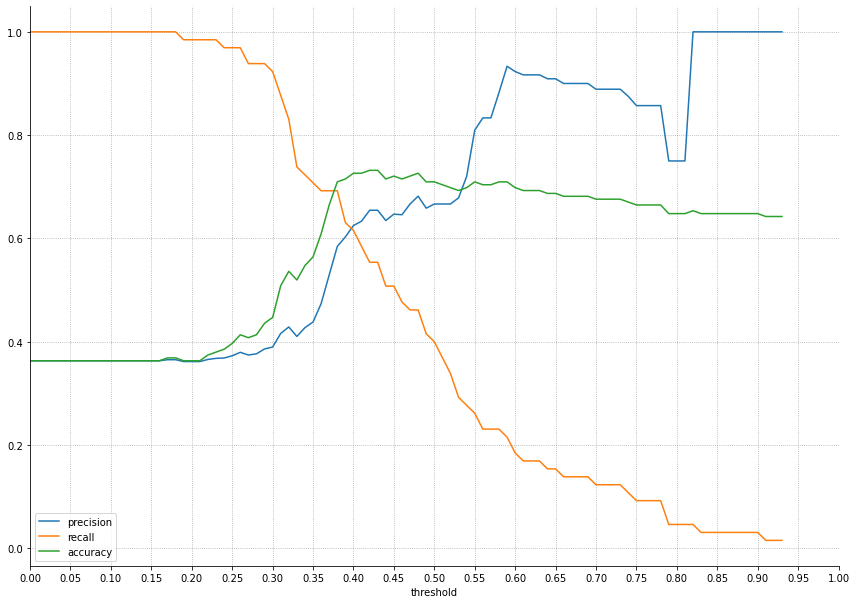

In [118]:
logistic_regression_util.plot_metrics_by_thresholds(y_test.survived, y_pred_proba.survived)

## Try out other combinations of features and models.


In [181]:
df = acquire.get_titanic_data()
train, test = prepare.prep_titanic(df)
train, validate = sklearn.model_selection.train_test_split(train, train_size=.8, random_state=123)

In [182]:
encoder = sklearn.preprocessing.OneHotEncoder(sparse = False)

encoder.fit(train[['sex']])
m = encoder.transform(train[['sex']])

train = pd.concat([train, pd.DataFrame(m, columns = ['female', 'male'], index = train.index)], axis =1)

In [183]:
m = encoder.transform(test[['sex']])

test = pd.concat([test, pd.DataFrame(m, columns = ['female', 'male'], index = test.index)], axis =1)

In [184]:
m = encoder.transform(validate[['sex']])
validate = pd.concat([validate, pd.DataFrame(m, columns = ['female', 'male'], index = validate.index)], axis =1)

In [123]:
X_train = train[['fare_scaled', 'pclass', 'age_scaled', 'female', 'male', 'C', 'Q', 'S']]
y_train = train[['survived']]


X_validate = validate[['fare_scaled', 'pclass', 'age_scaled', 'female', 'male', 'C', 'Q', 'S']]
y_validate = validate[['survived']]

X_test = test[['fare_scaled', 'pclass', 'age_scaled', 'female', 'male', 'C', 'Q', 'S']]
y_test = test[['survived']]

In [124]:
def logit_(X_validate, y_validate, X_train, y_train, C = 1):
    logit = LogisticRegression(C=C, random_state = 123, solver='saga')
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_train)
    y_pred_proba = logit.predict_proba(X_train)
    y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['died', 'survived'])
    t = 0.55
    yhat = (y_pred_proba > t).astype(int)
    print('\n')
    print(C)
    print('\n')
    print(classification_report(y_train, yhat.survived))
    
    y_pred1 = logit.predict(X_validate)
    y_pred1_proba = logit.predict_proba(X_validate)
    y_pred1_proba = pd.DataFrame(y_pred1_proba, columns = ['died', 'survived'])
    t = 0.55
    yhat1 = (y_pred1_proba > t).astype(int)
    print('\n')
    print(C, 'validate')
    print('\n')
    print(classification_report(y_validate, yhat1.survived))
    

In [125]:
c = [0.01, 0.1, 1, 10, 100, 1000]
for i in c:
    logit_(X_validate, y_validate, X_train, y_train, C = i)



0.01


              precision    recall  f1-score   support

           0       0.68      1.00      0.81       345
           1       0.98      0.29      0.45       224

    accuracy                           0.72       569
   macro avg       0.83      0.64      0.63       569
weighted avg       0.80      0.72      0.67       569



0.01 validate


              precision    recall  f1-score   support

           0       0.69      1.00      0.81        90
           1       1.00      0.23      0.37        53

    accuracy                           0.71       143
   macro avg       0.84      0.61      0.59       143
weighted avg       0.80      0.71      0.65       143



0.1


              precision    recall  f1-score   support

           0       0.78      0.92      0.84       345
           1       0.84      0.59      0.69       224

    accuracy                           0.79       569
   macro avg       0.81      0.76      0.77       569
weighted avg       0.80      0.79      

In [126]:
logit = LogisticRegression(C=0.01, random_state = 123, solver='saga')
logit.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
y_pred = logit.predict(X_train)

In [128]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['died', 'survived'])
t = 0.55
yhat = (y_pred_proba > t).astype(int)

print(classification_report(y_train, yhat.survived))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       345
           1       0.98      0.29      0.45       224

    accuracy                           0.72       569
   macro avg       0.83      0.64      0.63       569
weighted avg       0.80      0.72      0.67       569



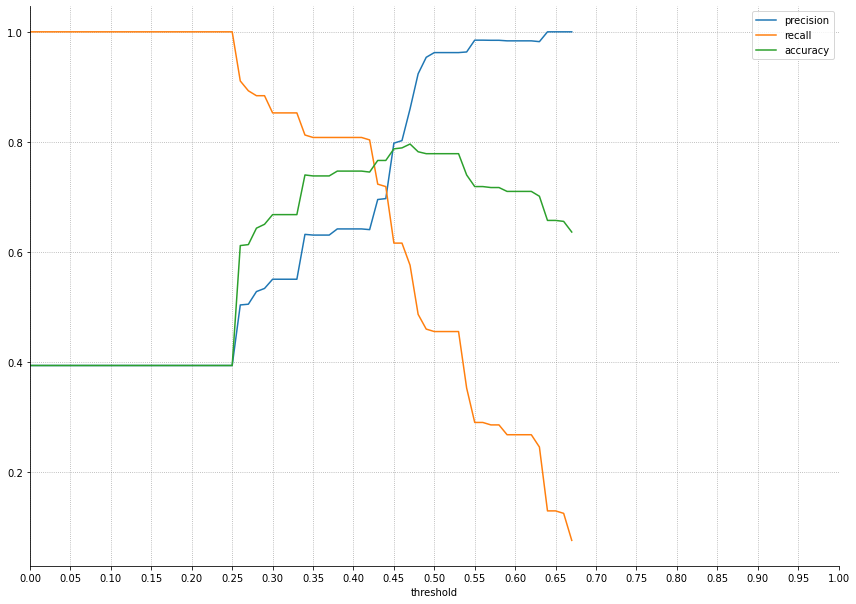

In [129]:
logistic_regression_util.plot_metrics_by_thresholds(y_train.survived, y_pred_proba.survived)

In [130]:
y_pred = logit.predict(X_validate)

In [131]:
y_pred_proba = logit.predict_proba(X_validate)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['died', 'survived'])
t = 0.55
yhat = (y_pred_proba > t).astype(int)

print(classification_report(y_validate, yhat.survived))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        90
           1       1.00      0.23      0.37        53

    accuracy                           0.71       143
   macro avg       0.84      0.61      0.59       143
weighted avg       0.80      0.71      0.65       143



In [132]:
y_pred = logit.predict(X_test)

In [133]:
y_pred_proba = logit.predict_proba(X_test)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['died', 'survived'])
t = 0.55
yhat = (y_pred_proba > t).astype(int)

print(classification_report(y_test, yhat.survived))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       114
           1       0.92      0.35      0.51        65

    accuracy                           0.75       179
   macro avg       0.82      0.67      0.67       179
weighted avg       0.80      0.75      0.72       179



In [134]:
table = pd.read_clipboard()

In [135]:
table

,"confusion_matrix(y_train,",y_pred)


In [136]:
# Plots below for training dataset
sns.lineplot(x = table['Log C'], y = 'Precision_t', data = table)
sns.lineplot(x = table['Log C'], y = 'Accuracy_t', data = table)
sns.lineplot(x = table['Log C'], y = 'Recall_t', data = table)

KeyError: 'Log C'

In [ ]:
# plots below for validate dataset
sns.lineplot(x = table['Log C'], y = 'Precision_v', data = table, label = 'Precision')
sns.lineplot(x = table['Log C'], y = 'Accuracy_v', data = table, label = 'Accuracy')
sns.lineplot(x = table['Log C'], y = 'Recall_v', data = table, label = 'Recall')
plt.ylabel("%")
plt.xlabel("Log C")
plt.title('Precision, Accuracy and Recall with t = 0.55')

# Decision Tree Exercise

### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [185]:
#df = acquire.get_titanic_data()
df = sns.load_dataset('titanic')
train, test = prepare.prep_titanic(df)

In [187]:
encoder = sklearn.preprocessing.OneHotEncoder(sparse = False)

encoder.fit(train[['sex']])
m = encoder.transform(train[['sex']])

train = pd.concat([train, pd.DataFrame(m, columns = ['female', 'male'], index = train.index)], axis =1)

In [188]:
train.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,C,Q,S,age_scaled,fare_scaled,female,male
329,1,1,female,16.0,0,1,57.9792,C,First,woman,...,Cherbourg,yes,False,1.0,0.0,0.0,0.195778,0.113168,1.0,0.0
749,0,3,male,31.0,0,0,7.7500,Q,Third,man,...,Queenstown,no,True,0.0,1.0,0.0,0.384267,0.015127,0.0,1.0


In [189]:
X_train = train[['fare_scaled', 'pclass', 'age_scaled', 'female', 'male']]
y_train = train[['survived']]

In [205]:
# #clf = RandomForestClassifier(bootstrap=True, 
#                             class_weight=None, 
#                             criterion='gini',
#                             min_samples_leaf=3,
#                             n_estimators=1000,
#                             max_depth=3, 
#                             random_state=123)
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [206]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [207]:
y_pred = clf.predict(X_train)

In [208]:
y_pred_proba = clf.predict_proba(X_train)

In [209]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(386, 49, 81, 196)

In [210]:
confusion_matrix(y_train, y_pred)

array([[386,  49],
       [ 81, 196]])

In [211]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.826552,0.800000,0.817416,0.813276,0.816222
recall,0.887356,0.707581,0.817416,0.797469,0.817416
f1-score,0.855876,0.750958,0.817416,0.803417,0.815058
support,435.000000,277.000000,0.817416,712.000000,712.000000


In [148]:
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

graph.render('Titanic_decision_tree', view=True)

'Titanic_decision_tree.pdf'

## Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 using entropy as your measure of impurity.

In [174]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

In [175]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [176]:
y_pred = clf.predict(X_train)

In [177]:
y_pred_proba = clf.predict_proba(X_train)

In [178]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,380,55
1,80,197


In [179]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.826087,0.781746,0.810393,0.803916,0.808836
recall,0.873563,0.711191,0.810393,0.792377,0.810393
f1-score,0.849162,0.744802,0.810393,0.796982,0.808561
support,435.000000,277.000000,0.810393,712.000000,712.000000


In [155]:
dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

graph.render('Titanic_decision_tree - entropy', view=True)

'Titanic_decision_tree - entropy.pdf'